In [1]:
import os 
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import lmfit

In [2]:
res = Path("Results/total_drücke.txt")
res.touch()
nf = open(res,"w")
nf.write("p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,13")

41

In [3]:
com = [[1e-5, 8.6e-6, 7.4e-6, 6.3e-6, 5.4e-6, 4.6e-6, 4.0e-6, 3.4e-6, 3e-6, 2.5e-6, 2.2e-6, 1.5e-6, 1e-6]]
comerr=[]
for i in range(len(com[0])):
    comerr.append(com[0][i]*0.3)
com.append(comerr)


Messfehler der partialdrücke in %

In [4]:
data=[[],[]]
for i in os.listdir('Data'):
    path = 'Data/'+i
    with open(path, mode='r') as tf:
        dataex = np.genfromtxt((line.replace(',', '.') for line in tf),delimiter=";",skip_header=21).T        
        data[0].append(np.mean(dataex[4]))
        data[1].append(np.std(dataex[4]))
data=np.array(data)


mederr=[]
for i in range(len(data[0])):
    mederr.append(data[1,i]/data[0,i]*100)
print(np.mean(mederr))

0.5339589887826315


13


<ErrorbarContainer object of 3 artists>

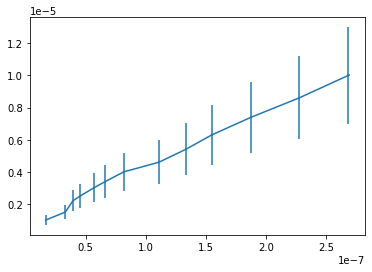

In [5]:
print(len(com[0]))
plt.errorbar(y=com[0],x=data[0],yerr=com[1],xerr=data[1])


In [8]:
model_lin = lmfit.models.LinearModel()
pars_lin = model_lin.guess(data=com[0],x=data[0])
out_lin =  model_lin.fit(com[0],x=data[0],weights=1/com[1],params=pars_lin,nan_policy='propagate')
out_lin.plot()

TypeError: unsupported operand type(s) for /: 'int' and 'list'

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 3
    # data points      = 13
    # variables        = 2
    chi-square         = 5.6205e-16
    reduced chi-square = 5.1096e-17
    Akaike info crit   = -485.838510
    Bayesian info crit = -484.708611
[[Variables]]
    slope:      0.02856938 +/- 7.3873e-04 (2.59%) (init = 0.02856938)
    intercept: -2.2289e-08 +/- 3.9391e-09 (17.67%) (init = -2.228933e-08)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.864


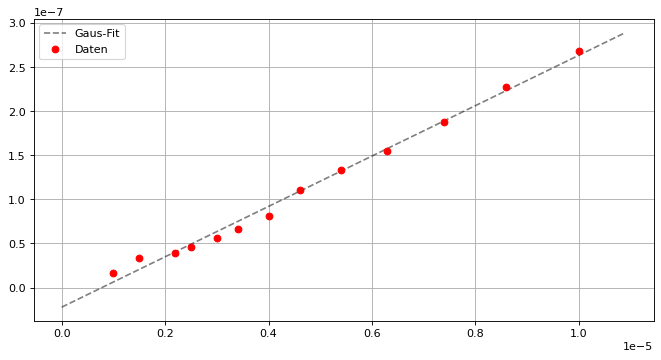

In [ ]:
print(out_lin.fit_report())

fig = plt.figure(figsize=(10,5),dpi=80,linewidth=50)

plt.errorbar(hal,total,fmt='o',ecolor='lightgray',color='r', elinewidth=3, capsize=0,zorder=15,label="Daten")
plt.plot(np.arange(0,1.1e-5,1e-7),out_lin.eval(x=np.arange(0,1.1e-5,1e-7)),zorder=10,color='k',linestyle='--',alpha=0.5,label="Gaus-Fit")

plt.grid()
plt.legend()
plt.savefig('Results/druckvergleich.pdf')
#Müssen die daten noch reskaliert werden mit 28????????????????????